In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2269,ham,Haha i think i did too,NaN,NaN,NaN
2498,ham,"I know where the &lt;#&gt; is, I'll be there...",NaN,NaN,NaN
388,spam,4mths half price Orange line rental & latest c...,NaN,NaN,NaN
2744,ham,"Tick, tick, tick ... Babe",NaN,NaN,NaN
670,ham,Ho ho - big belly laugh! See ya tomo,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3313,ham,Oh gei. That happend to me in tron. Maybe ill ...
68,spam,"Did you hear about the new \Divorce Barbie\""? ..."
3287,spam,Someone U know has asked our dating service 2 ...
3816,ham,This is my number by vivek..
2086,ham,Dude how do you like the buff wind.


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3843,ham,"Yeah that's what I thought, lemme know if anyt..."
4738,ham,We have pizza if u want
5454,ham,Im just wondering what your doing right now?
3342,ham,"I haven't forgotten you, i might have a couple..."
5523,ham,Going to join tomorrow.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

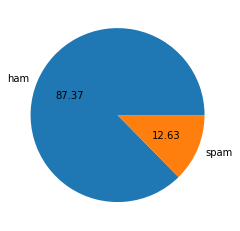

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [34]:
import seaborn as sns

In [35]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\shyam\anaconda3\lib\site-packages (0.12.2)


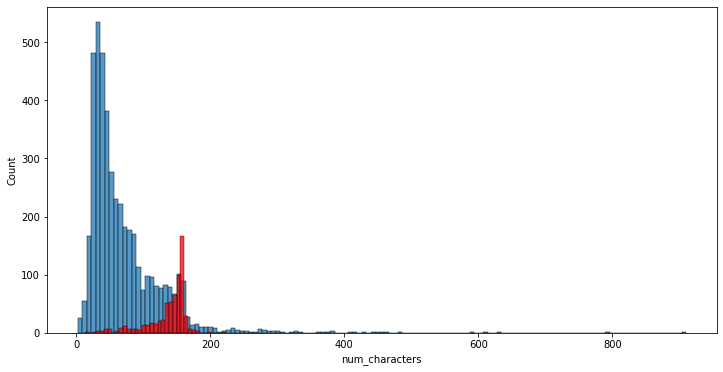

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

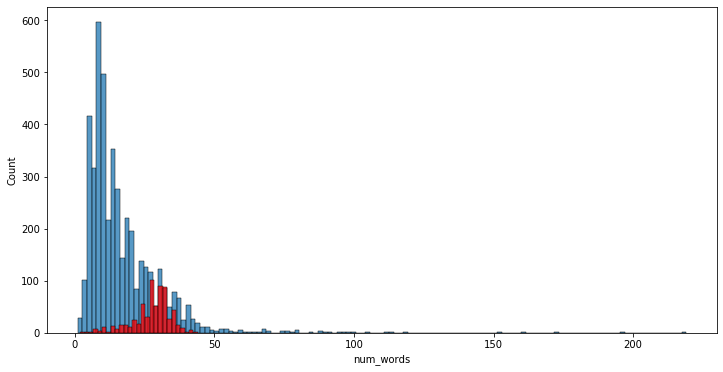

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

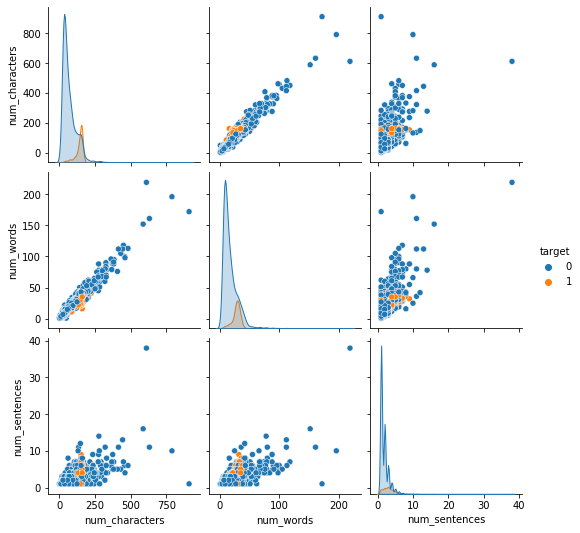

In [38]:
sns.pairplot(df,hue='target')

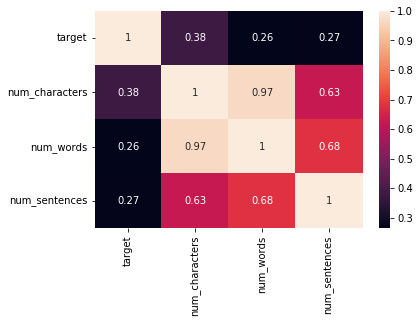

In [39]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [40]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [41]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shyam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
!pip install wordcloud


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
import PIL
print(PIL.__version__)

9.5.0


In [51]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

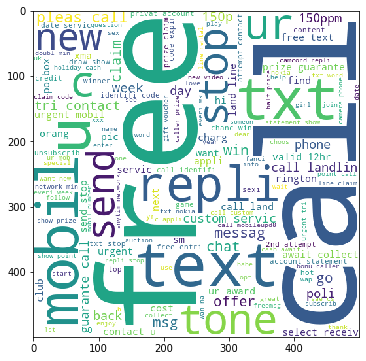

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

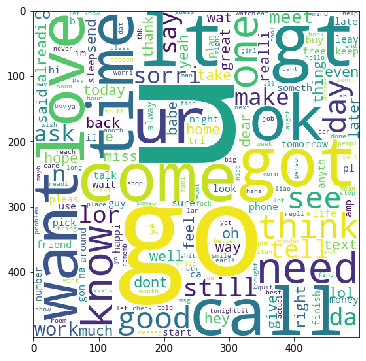

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [57]:
len(spam_corpus)

9883

In [65]:
from collections import Counter

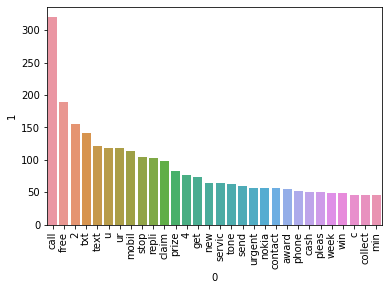

In [66]:
# Get the most common 30 words in the spam corpus
spam_word_counts = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common words
spam_df = pd.DataFrame(spam_word_counts, columns=[0, 1])

# Plot the barplot using sns.barplot
sns.barplot(x=0, y=1, data=spam_df)

# Rotate the x-axis labels for readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [67]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

34773

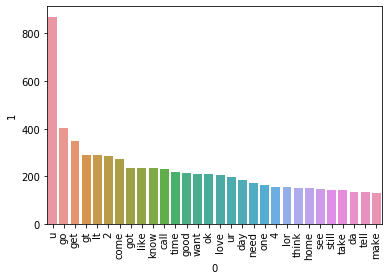

In [69]:
# Get the most common 30 words in the ham corpus
ham_word_counts = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common words
ham_df = pd.DataFrame(ham_word_counts, columns=[0, 1])

# Plot the barplot using sns.barplot with explicit x and y arguments
sns.barplot(x=0, y=1, data=ham_df)

# Rotate the x-axis labels for readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [70]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [72]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [73]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [74]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [75]:
X.shape

(5169, 3000)

In [76]:
y = df['target'].values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [83]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [84]:
# tfidf --> MNB

In [87]:
!pip install xgboost

In [88]:
from xgboost import XGBClassifier

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [90]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [91]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [92]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [93]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9666666666666667)

In [94]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8582677165354331
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667


In [95]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [96]:
performance_df

,Algorithm,Accuracy,Precision
1,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.905222,1.000000
2,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.972921,1.000000
8,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.977756,0.983193
5,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.971954,0.973913
0,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.974855,0.966667
4,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.957447,0.951923
10,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.969052,0.941667
6,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.964217,0.931624
9,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.948743,0.929293
7,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.954545,0.858268


In [113]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [114]:
performance_df1

,Algorithm,variable,value
0,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.905222
1,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.972921
2,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.977756
3,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.971954
4,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.974855
5,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.957447
6,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.969052
7,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.964217
8,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.948743
9,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.954545


In [100]:
print(performance_df1.head())
print(performance_df1.columns)

                                           Algorithm  variable     value
0  (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...  Accuracy  0.905222
1  (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...  Accuracy  0.972921
2  (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...  Accuracy  0.977756
3  (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...  Accuracy  0.971954
4  (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...  Accuracy  0.974855
Index(['Algorithm', 'variable', 'value'], dtype='object')


In [103]:
print(performance_df1['Algorithm'].dtype)
print(performance_df1['Algorithm'].head())

object
0    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
1    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
2    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
3    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
4    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
Name: Algorithm, dtype: object


In [104]:
print(performance_df1['Algorithm'].isnull().sum())  # Check for NaN values
print(performance_df1['Algorithm'].apply(type).value_counts())  # Check for unexpected types


0
<class 'dict_keys'>    22
Name: Algorithm, dtype: int64


In [116]:
performance_df1['Algorithm'] = performance_df1['Algorithm'].apply(str)


In [124]:
performance_df1['Algorithm'] = performance_df1['Algorithm'].astype('category')


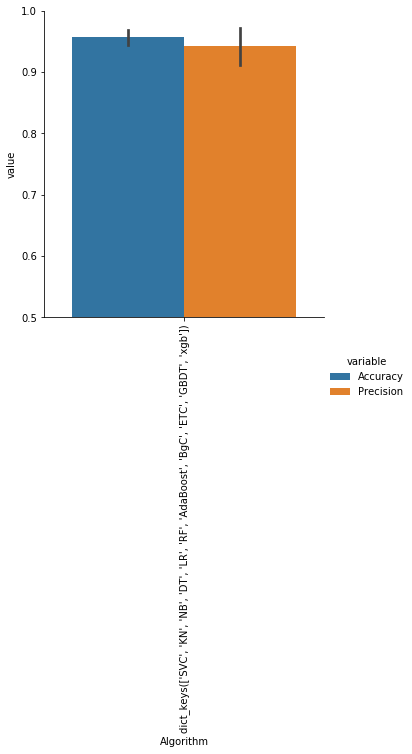

In [125]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [126]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [127]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [128]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [130]:
print(performance_df['Algorithm'].head())
print(temp_df['Algorithm'].head())


1    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
2    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
8    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
5    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
0    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
Name: Algorithm, dtype: object
1    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
2    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
8    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
5    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
0    (SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...
Name: Algorithm, dtype: object


In [132]:
# Convert dict_keys to a list or string
performance_df['Algorithm'] = performance_df['Algorithm'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else x)
temp_df['Algorithm'] = temp_df['Algorithm'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else x)

# If you need to convert lists to strings (to ensure hashable types)
performance_df['Algorithm'] = performance_df['Algorithm'].apply(str)
temp_df['Algorithm'] = temp_df['Algorithm'].apply(str)


In [133]:
new_df = performance_df.merge(temp_df, on='Algorithm')


In [134]:
print(new_df.head())


                                           Algorithm  Accuracy  Precision  \
0  dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...  0.905222        1.0   
1  dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...  0.905222        1.0   
2  dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...  0.905222        1.0   
3  dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...  0.905222        1.0   
4  dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...  0.905222        1.0   

   Accuracy_scaling  Precision_scaling  
0          0.905222           1.000000  
1          0.972921           1.000000  
2          0.977756           0.983193  
3          0.971954           0.973913  
4          0.974855           0.966667  


In [135]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [136]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [138]:
# Convert dict_keys to a list in 'Algorithm' column if it's of type dict
new_df_scaled['Algorithm'] = new_df_scaled['Algorithm'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else x)
temp_df['Algorithm'] = temp_df['Algorithm'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else x)

# If you need to convert lists to strings (to ensure hashable types)
new_df_scaled['Algorithm'] = new_df_scaled['Algorithm'].apply(str)
temp_df['Algorithm'] = temp_df['Algorithm'].apply(str)

# Now perform the merge
new_df = new_df_scaled.merge(temp_df, on='Algorithm')


In [139]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.972921,1.000000
2,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.977756,0.983193
3,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.971954,0.973913
4,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.974855,0.966667
...,...,...,...,...,...,...,...,...,...
14636,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.969052,0.941667
14637,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.964217,0.931624
14638,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.948743,0.929293
14639,"dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'...",0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.954545,0.858268


In [140]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [141]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [142]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1.0, kernel='sigmoid', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('nb',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)),
                             ('et',
                              ExtraTreesClassifier...
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_

In [143]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.975609756097561


In [149]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [150]:
from sklearn.ensemble import StackingClassifier

In [151]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [152]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [153]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))